C:\Users\9234~1\AppData\Local\Temp/ipykernel_9000/4159979078.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean = mean, cov = cov, size = 10000)


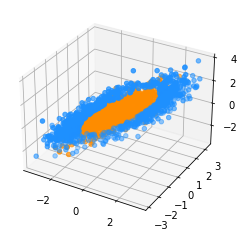

1000
1000


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

mean = np.random.sample(3)
cov = np.random.sample((3, 3))
data = np.random.multivariate_normal(mean = mean, cov = cov, size = 10000)
def plot(data,cov,mean,d = 2,e = 0.4):
    class1 = []
    class2 = []
    for point in data:
        mean_reduce = np.expand_dims(point-mean,axis = 1)
        temp = (mean_reduce.T @ np.linalg.inv(cov) @ mean_reduce).squeeze()
        if temp <= d**2 - e**2:
            class1.append(point)
        else:
            class2.append(point)
    part1 = np.array(class1)[:1000]
    part2 = np.array(class2)[:1000]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(part1[:,0], part1[:,1], part1[:,2],c = '#FF8C00')
    ax.scatter(part2[:,0], part2[:,1], part2[:,2],c = '#1E90FF')
    plt.show()

    return part1[:1000],part2[:1000]

data1,data2 = plot(data,cov,mean)
print(data1.shape[0])
print(data2.shape[0])

x_train = np.concatenate([data1,data2])
y_train = np.concatenate([np.zeros(len(data1)),np.ones(len(data2))])

x_train, y_train = shuffle(x_train, y_train, random_state=42)

In [57]:
import matplotlib.animation as animation

def get_vec(lambd):
    A = lambd[:9].reshape(3,3)
    values, vectors = np.linalg.eigh(A)
    vectors = vectors.T
    transformed = []
    for v in vectors:
        oout = []
        for i in range(3):
            for j in range(3):
                oout.append(v[i]*v[j])
        for i in range(3):
            oout.append(v[i])
        oout.append(0)
        transformed.append(oout)
    tran_v = np.array(transformed)
    return tran_v, values

def pred(x_train,lambd):
    x_0 = []
    x_1 = []
    for i in range(len(x_train)):
        x = x_train[i]
        out = []
        for i in range(3):
            for j in range(3):
                out.append(x[i]*x[j])
        for i in range(3):
            out.append(x[i])
        out.append(1)
        ksi_x = np.array(out)
        res = np.dot(ksi_x,lambd)
        if res < 0:
            x_0.append(x)
        else:
            x_1.append(x)
    return np.array(x_0), np.array(x_1)

def perceptron(x_train,y_train,lambd):
    non_correct = True
    timer = 1
    while non_correct:
        non_correct = False
        for i in range(len(x_train)):
            x_11 = x_train[i]
            outt = []
            for a in range(3):
                for b in range(3):
                    outt.append(x_11[a]*x_11[b])
            for a in range(3):
                outt.append(x_11[a])
            outt.append(1)
            ksi_x = np.array(outt)
            if y_train[i] == 0:
                ksi_x = ksi_x * -1
            if np.dot(ksi_x,lambd) <= 0:
                lambd += ksi_x
                non_correct = True
        
        if not non_correct:
            t_v,values = get_vec(lambd)
            for i in range(len(values)):
                if values[i]<=0:
                    lambd += t_v[i]
                    non_correct = True
        convv = lambd[:9].reshape(3,3)
        meann = np.linalg.solve(convv,lambd[9:12])
        cov = np.linalg.inv(convv) * 100
        mean = meann
        x_0, x_1 = pred(x_train,lambd)
        if timer % 5 == 0:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(x_0[:,0], x_0[:,1], x_0[:,2],c = '#FF8C00')
            ax.scatter(x_1[:,0], x_1[:,1], x_1[:,2],c = '#1E90FF')
            fig.savefig(f'D:/lab4/result/result_{timer}.png')
        timer +=1
        if timer == 50:
            break
    
    return lambd,cov,mean   

In [58]:
lambd = np.zeros(13)
lambd,final_cov,final_mean = perceptron(x_train,y_train,lambd)
print(final_cov)
print(final_mean)

[[1.27469017 0.96402811 1.06273502]
 [0.96402811 0.12210826 0.36877403]
 [1.06273502 0.36877403 1.98628749]]
[-0.13539073 -0.03401614 -0.91470388]
